## NLP Topic Modelling with Spacy

 ### Loading Packages
- **pandas** : loading and manuplating data.
- **matplotlib** : visualizaing the data into graphs.
- **plotly** : visualizaing the data into advance graphs.
- **wordcloud** : wordcloud visulaization of most common words.
- **subprocess** :
- **pyLDAvis** : visualizing interactive LDA graph.


In [18]:
import numpy as np 
import pandas as pd
import regex as re
import string

import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#### Loading the dataset:

In [2]:
df = pd.read_csv('Monash_crawled.csv')
df.head()

,uri,url,date,title,body
0,1395271488,http://www.theguardian.com/environment/2020/ja...,2020-01-01,Canberra experiences worst air quality on reco...,Canberra\n has experienced its worst air qual...
1,1396563053,https://weather.com/news/news/2020-01-02-thous...,2020-01-02,Thousands Clog Roads Fleeing Australian Bushfi...,As\n dawn broke over a blackened Australi...
2,1397549175,https://www.businessinsider.com/baby-milestone...,2020-01-03,Key milestones your baby can reach in the firs...,Your baby's brain and body grow a lot during ...
3,1397689515,https://www.dailymail.co.uk/health/article-784...,2020-01-03,"Air pollution can break your BONES, study sugg...",Living in polluted cities may make your bones...
4,1397806413,https://www.independent.co.uk/life-style/gadge...,2020-01-03,'World's most efficient battery' can power a s...,Researchers have developed a new battery they...


In [3]:
df.info() # observing the structure of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uri     366 non-null    int64 
 1   url     366 non-null    object
 2   date    366 non-null    object
 3   title   366 non-null    object
 4   body    366 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.4+ KB


#### Text Preprocessing

- Text to lower case.
- words with digits.
- removing punctuation.
- removing '\n' in text.

In [25]:
# function to preform basic text pre-porcessing
def cleaning(text):  
    nlp = spacy.load('en_core_web_sm') # loading the spacy model
    doc = nlp(text) # applying the spacy model on text data
    tokens = [token.lemma_ for token in doc if not token.is_stop] # lemmation and removing stop words
    return " ".join(tokens) # return the text 

In [27]:
# text preprocessing using pandas
df['body_clean'] = df.body.apply(lambda x: x.lower())
df['body_clean'] = df.body_clean.str.replace(r'\[.*?\]','')
df['body_clean'] = df.body_clean.str.replace(r'[%s]' % re.escape(string.punctuation), '')
df['body_clean'] = df.body_clean.str.replace(r'\w*\d\w*','')
df['body_clean'] = df.body_clean.str.replace('\n','')
df[['body','body_clean']].head()

,body,body_clean
0,Canberra\n has experienced its worst air qual...,canberra experienced worst quality record...
1,As\n dawn broke over a blackened Australi...,dawn broke over blackened australian la...
2,Your baby's brain and body grow a lot during ...,your babys brain body grow during first ...
3,Living in polluted cities may make your bones...,living polluted cities make your bones weak...
4,Researchers have developed a new battery they...,researchers have developed battery they cla...


In [28]:
## lemming and removing stop words using earlier defined cleaning function
df['body_clean_final'] = df.body_clean.apply(lambda x: cleaning(x))
df[['body','body_clean','body_clean_final']].head()

,body,body_clean,body_clean_final
0,Canberra\n has experienced its worst air qual...,canberra experienced worst quality record...,canberra experience bad quality reco...
1,As\n dawn broke over a blackened Australi...,dawn broke over blackened australian la...,dawn break blacken australian landsca...
2,Your baby's brain and body grow a lot during ...,your babys brain body grow during first ...,babys brain body grow month baby de...
3,Living in polluted cities may make your bones...,living polluted cities make your bones weak...,live polluted city bone weak easy br...
4,Researchers have developed a new battery they...,researchers have developed battery they cla...,researcher develop battery claim power...


In [71]:
df['body_clean_final'] = df.body_clean_final.str.replace(r'\b(\w{1,3})\b', '')

months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] 
df.body_clean_final = df.body_clean_final.apply(lambda x: [item for item in x.split(' ') 
                                                           if item != '' and item not in months]).str.join(' ')

df[['body','body_clean','body_clean_final']].head()

,body,body_clean,body_clean_final
0,Canberra\n has experienced its worst air qual...,canberra experienced worst quality record...,canberra experience quality record bushfire sm...
1,As\n dawn broke over a blackened Australi...,dawn broke over blackened australian la...,dawn break blacken australian landscape sunday...
2,Your baby's brain and body grow a lot during ...,your babys brain body grow during first ...,babys brain body grow month baby develop pace ...
3,Living in polluted cities may make your bones...,living polluted cities make your bones weak...,live polluted city bone weak easy break resear...
4,Researchers have developed a new battery they...,researchers have developed battery they cla...,researcher develop battery claim power phone...


In [72]:
df_clean = df.body_clean_final
df_clean

0      canberra experience quality record bushfire sm...
1      dawn break blacken australian landscape sunday...
2      babys brain body grow month baby develop pace ...
3      live polluted city bone weak easy break resear...
4      researcher develop   battery claim power phone...
                             ...                        
361    publish aedt update aedt expert believe resear...
362    publish aedt update aedt claim spread suppress...
363    publish aedt update aedt academic modelling su...
364    publish aedt update aedt increase social isola...
365    spider resemble vincent gogh famous starry nig...
Name: body_clean_final, Length: 366, dtype: object

Using a word cloud to plot the most common words in the text document

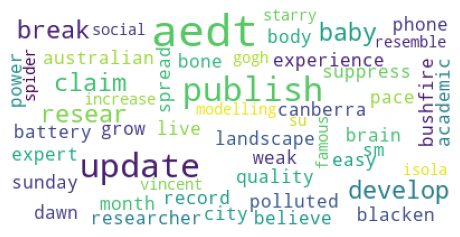

In [73]:
# figure settings
mpl.rcParams['figure.figsize']=(8.0,8.0)
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS) # remove stopwords

# create the wordcloud
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50, max_font_size=40, random_state=42).generate(str(df_clean))

# Plot the wordcloud
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

### N-Gram Analysis

- Top 20 Uni-grams
- Top 20 Bi-Grams
- Top 20 Tri-Grams

Below is the function to calculate the n-grams:
- Countvectorize to vectorize the words


In [74]:
# function to get the uni, bi and tri grams
def get_top_n_grams(text, n=None, ngrams = (1,1)):
    # define the Countvectorizer with the number of grams, by default its (1,1) which is unigrams
    vec = CountVectorizer(ngram_range= ngrams).fit(text) #
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [75]:
# Call the function get_top_n_grams for unigrams
common_words = get_top_n_grams(df_clean, 20)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
# plot the top 20 unigrams
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 unigrams in the text after removing stop words and lemmatization"))
fig.show()

In [76]:
# Call the function get_top_n_grams for unigrams
common_words = get_top_n_grams(df_clean, 20, (2,2))
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
# plot the top 20 bigrams
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the text after removing stop words and lemmatization"))
fig.show()

In [77]:
# Call the function get_top_n_grams for unigrams
common_words = get_top_n_grams(df_clean, 20, (3,3))
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
# plot the top 20 Trigrams
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the text"))
fig.show()

### Preforming LDA

In [80]:
# Creating the countvectorizer 
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000, #keep only 5000 words to count          
                            )

# fit and transform the data using count vectorizer
data_vectorized = vectorizer.fit_transform(df_clean)

# create the lda model
lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
# fit and transform the lda model
lda_output = lda_model.fit_transform(data_vectorized)

# plot the topic 
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3      32.420952   8.115230       1        1  40.293064
7       0.648955  71.707100       2        1  27.503786
2      71.019684   9.971006       3        1  10.943838
0       3.785981  33.185135       4        1   7.119210
4     -42.666500  -9.222070       5        1   4.814927
5      -3.621689 -43.526516       6        1   4.130082
8      -3.632402  -4.171708       7        1   2.834790
1     -36.584400  35.804413       8        1   1.618509
9      44.391380  50.615383       9        1   0.715067
6      40.235809 -31.591665      10        1   0.026727, topic_info=             Term         Freq        Total Category  logprob  loglift
910   coronavirus  1551.000000  1551.000000  Default  30.0000  30.0000
4103        virus  1064.000000  1064.000000  Default  29.0000  29.0000
299     australia  1769.000000  1769.000000  Default  28.0000  28.0000
584          case   893.000000   893.000000  Default  27.0000  27.0000
2766       people  1470.000000  1470.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
764          come     0.016850   394.184237  Topic10  -7.6795  -1.8330
4236        world     0.016621   364.038996  Topic10  -7.6932  -1.7671
2661     outbreak     0.016776   442.725326  Topic10  -7.6839  -1.9535
3605        state     0.016370   317.026070  Topic10  -7.7084  -1.6440
4014   university     0.016758   708.853979  Topic10  -7.6850  -2.4253

[730 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         2  0.279835         aany
2         7  0.279835         aany
2         9  0.279835         aany
5         1  0.066360  abercrombie
5         5  0.066360  abercrombie
...     ...       ...          ...
4260      6  0.127011         year
4260      7  0.046571         year
4260      9  0.008467         year
4269      1  0.977297     yokohama
4269      2  0.011634     yokohama

[1942 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 3, 1, 5, 6, 9, 2, 10, 7])

#### LDAvis Interpretation:
* The light blue indicates the overall freqency of words in the entire document.
* The red indicaes the frequency of words within the particual topic. 

#### Lambda Interpretation:
* If the lambda value is 0, it indicates how excusive the word is in all the topics.
* As we increase the value of, it indicates how probable a word is to appear in a all topics.


#### Topic Distribution

In [81]:
# Get the topics Distribution
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords_lda = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=17)

df_topic_keywords_lda = pd.DataFrame(topic_keywords_lda)
df_topic_keywords_lda.columns = ['Word '+str(i) for i in range(df_topic_keywords_lda.shape[1])]
df_topic_keywords_lda.index = ['Topic '+str(i) for i in range(df_topic_keywords_lda.shape[0])]
df_topic_keywords_lda

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16
Topic 0,area,patient,study,cancer,datum,brain,analysis,result,level,connection,value,benign,include,test,woman,battery,author
Topic 1,coronavirus,aspen,beach,woman,party,case,group,suburb,virus,sydney,melbourne,northern,australia,bondi,people,cluster,stonnington
Topic 2,university,work,time,like,researcher,year,woman,australia,world,people,feel,need,cell,sleep,monash,technology,help
Topic 3,australia,coronavirus,australian,people,health,china,south,ship,flight,virus,case,passenger,week,tell,picture,cruise,quarantine
Topic 4,australia,specie,coach,university,year,research,marsupial,marini,mountain,scientist,water,australian,cell,national,mouse,like,monash
Topic 5,bushfire,climate,australia,smoke,change,year,weather,south,season,burn,summer,temperature,extreme,condition,quality,rain,flood
Topic 6,people,virus,wuhan,australia,china,coronavirus,animal,case,infect,week,australian,spread,health,patient,disease,government,confirm
Topic 7,coronavirus,virus,people,china,case,australia,wuhan,chinese,mask,spread,outbreak,health,confirm,symptom,student,test,patient
Topic 8,smoke,council,burn,pollution,fine,player,review,wildfire,issue,melbourne,city,play,exposure,million,reduction,tournament,risk
Topic 9,cancer,seal,clap,study,university,time,grey,male,researcher,energy,monash,cell,breast,band,burville,spread,heart


#### Most Dominant Topics

In [82]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# Return Most dominant topic:
def most_dominant(model_output, df_topic_keywords, df_clean = df, col = 'body_clean'):
    # column names
    topicnames = df_topic_keywords.T.columns

    # index names
    docnames = ["Doc" + str(i) for i in range(len(df_clean))]

    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(model_output, 2), columns=topicnames, index=docnames)

    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)
    df_document_topic['dominant_topic'] = dominant_topic

    df_document_topic.reset_index(inplace=True)
    df_sent_topic= pd.merge(df_clean, df_document_topic, left_index=True, right_index=True)
    df_sent_topic.drop('index', axis=1, inplace=True)

    df_topic_theme = df_sent_topic[[col, 'dominant_topic']]

    print(df_topic_theme.head(15))
    return(df_topic_theme)
#run function
df_topic_theme_lda = most_dominant(lda_output, df_topic_keywords_lda)

                                           body_clean  dominant_topic
0    canberra  experienced  worst  quality  record...               3
1         dawn broke over  blackened australian la...               3
2    your babys brain  body grow   during  first  ...               2
3    living  polluted cities  make your bones weak...               0
4    researchers have developed   battery they cla...               0
5    scientists have discovered  specific protein ...               2
6    washington   xinhua   international team iden...               2
7       published     aedt  january          updat...               3
8    while firefighters  celebrating  reprieve thi...               5
9    washington urdupoint  pakistan point news    ...               2
10       rework  particle bonds  sulfur cathodes  ...               2
11      published                 updated         ...               5
12    terrifying image shows  devastation caused  ...               5
13    thing   desire

#### Second run on LDAvis

In [83]:
# create the lda model
lda_model2 = LatentDirichletAllocation(n_components=14, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
# fit and transform the lda model
lda_output = lda_model2.fit_transform(data_vectorized)

# plot the topic 
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model2, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3        1.425140 -203.131439       1        1  40.084976
7       93.696953  -55.018154       2        1  22.878494
13     141.694016   25.320429       3        1  21.745621
11    -126.233505    5.739788       4        1   3.991374
0      -59.868134  101.519302       5        1   3.842919
2      151.966629  133.119141       6        1   3.690955
1       12.542690 -101.441658       7        1   1.518815
8       49.372585   57.773476       8        1   0.913534
4      203.505997  -84.541840       9        1   0.695058
12     119.923477 -166.068970      10        1   0.497885
9      -19.315592   -8.882428      11        1   0.083097
6      -95.841057 -109.373474      12        1   0.019090
5       37.554749  165.057098      13        1   0.019090
10     243.648911   32.733547      14        1   0.019090, topic_info=             Term         Freq        Total Category  logprob  loglift
910   coronavirus  1573.000000  1573.000000  Default  30.0000  30.0000
4103        virus  1069.000000  1069.000000  Default  29.0000  29.0000
4014   university   717.000000   717.000000  Default  28.0000  28.0000
4230         work   432.000000   432.000000  Default  27.0000  27.0000
2766       people  1488.000000  1488.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2390       medium     0.007696   133.262620  Topic14  -8.1267  -1.1957
1690       global     0.007748   191.577651  Topic14  -8.1200  -1.5519
933       country     0.007780   432.113478  Topic14  -8.1159  -2.3612
516      bushfire     0.007616   211.601701  Topic14  -8.1371  -1.6684
2528         need     0.007598   347.543494  Topic14  -8.1395  -2.1671

[965 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         2  0.506925  aabsolutely
0         3  0.506925  aabsolutely
2         2  0.337407         aany
2         3  0.337407         aany
5         3  0.064879  abercrombie
...     ...       ...          ...
4265      1  0.407833    yesterday
4265      2  0.203916    yesterday
4265      3  0.339861    yesterday
4269      1  0.979631     yokohama
4269      2  0.011260     yokohama

[2335 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 14, 12, 1, 3, 2, 9, 5, 13, 10, 7, 6, 11])